<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/B%C3%A0i_t%E1%BA%ADp_ti%E1%BB%81n_x%E1%BB%AD_l%C3%AD_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Bài tập] Phân tích dữ liệu Credit_scoring**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [17]:
df=pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/26023345/Credit_Scoring.csv',encoding='utf-8')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [19]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                9                 0                              0.116951   
1               10                 0                              0.189169   
2               11                 0                              0.644226   
3               12                 0                              0.018798   
4               13                 0                              0.010352   
...            ...               ...                                   ...   
149987      149996                 0                              0.040674   
149988      149997                 0                              0.299745   
149989      149998                 0                              0.246044   
149990      149999                 0                              0.000000   
149991      150000                 0                              0.850283   

        age  NumberOfTime30-5

In [20]:
df.shape

(149992, 12)

In [21]:
# check null
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.notna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,True,True,True,True,True,True,False,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,True,True,True,True,True,True,True,True,True,True,True,True
149988,True,True,True,True,True,True,True,True,True,True,True,True
149989,True,True,True,True,True,True,False,True,True,True,True,True
149990,True,True,True,True,True,True,True,True,True,True,True,True


In [23]:
df1=df.fillna(0)

In [24]:
df1

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [25]:
df2=df.fillna(method='ffill')
df2

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,5584.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

In [26]:
import matplotlib.pyplot as plt


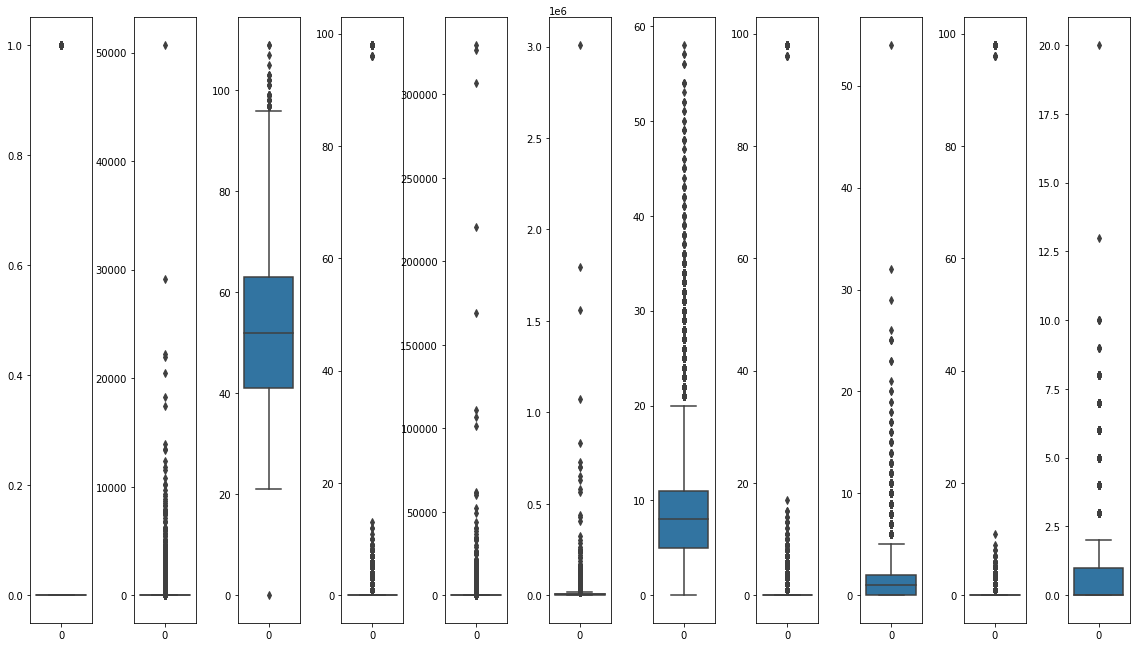

In [27]:
fig,ax=plt.subplots(1,11)
#fig = plt.figure(figsize=(10,60))
fig.set_size_inches(16,9)
fig.tight_layout()
#sns.boxplot(data=df1['Unnamed: 0'],ax=ax[1])
sns.boxplot(data=df1['SeriousDlqin2yrs'],ax=ax[0])
sns.boxplot(data=df1['RevolvingUtilizationOfUnsecuredLines'],ax=ax[1])
sns.boxplot(data=df1['age'],ax=ax[2])
sns.boxplot(data=df1['NumberOfTime30-59DaysPastDueNotWorse'],ax=ax[3])
sns.boxplot(data=df1['DebtRatio'],ax=ax[4])
sns.boxplot(data=df1['MonthlyIncome'],ax=ax[5])
sns.boxplot(data=df1['NumberOfOpenCreditLinesAndLoans'],ax=ax[6])
sns.boxplot(data=df1['NumberOfTimes90DaysLate'],ax=ax[7])
sns.boxplot(data=df1['NumberRealEstateLoansOrLines'],ax=ax[8])
sns.boxplot(data=df1['NumberOfTime60-89DaysPastDueNotWorse'],ax=ax[9])
sns.boxplot(data=df1['NumberOfDependents'],ax=ax[10])

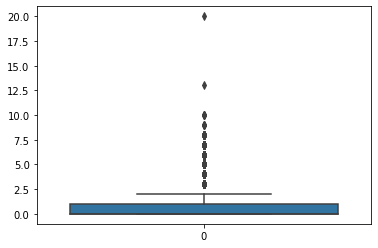

In [28]:
sns.boxplot(data=df1['NumberOfDependents'])

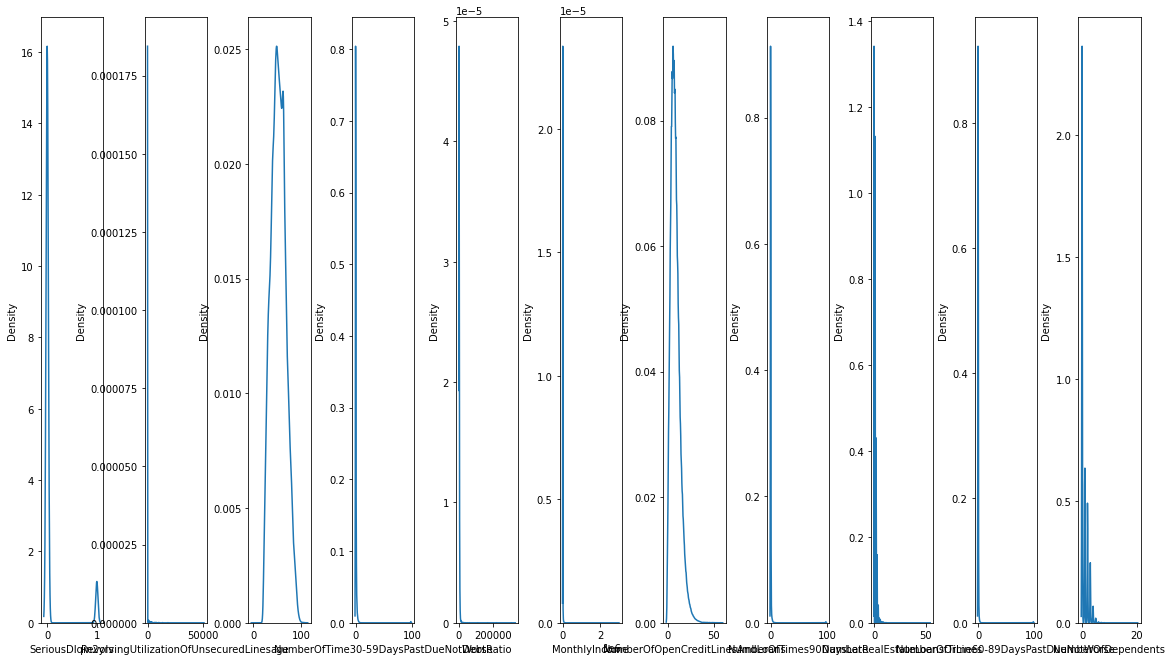

In [15]:
fig,ax=plt.subplots(1,11)
fig.set_size_inches(16,9)
#fig.xticks(rotation = 45) 
fig.tight_layout()

#sns.boxplot(data=df1['Unnamed: 0'],ax=ax[1])
sns.kdeplot(data=df1['SeriousDlqin2yrs'],ax=ax[0])
sns.kdeplot(data=df1['RevolvingUtilizationOfUnsecuredLines'],ax=ax[1])
sns.kdeplot(data=df1['age'],ax=ax[2])
sns.kdeplot(data=df1['NumberOfTime30-59DaysPastDueNotWorse'],ax=ax[3])
sns.kdeplot(data=df1['DebtRatio'],ax=ax[4])
sns.kdeplot(data=df1['MonthlyIncome'],ax=ax[5])
sns.kdeplot(data=df1['NumberOfOpenCreditLinesAndLoans'],ax=ax[6])
sns.kdeplot(data=df1['NumberOfTimes90DaysLate'],ax=ax[7])
sns.kdeplot(data=df1['NumberRealEstateLoansOrLines'],ax=ax[8])
sns.kdeplot(data=df1['NumberOfTime60-89DaysPastDueNotWorse'],ax=ax[9])
sns.kdeplot(data=df1['NumberOfDependents'],ax=ax[10])

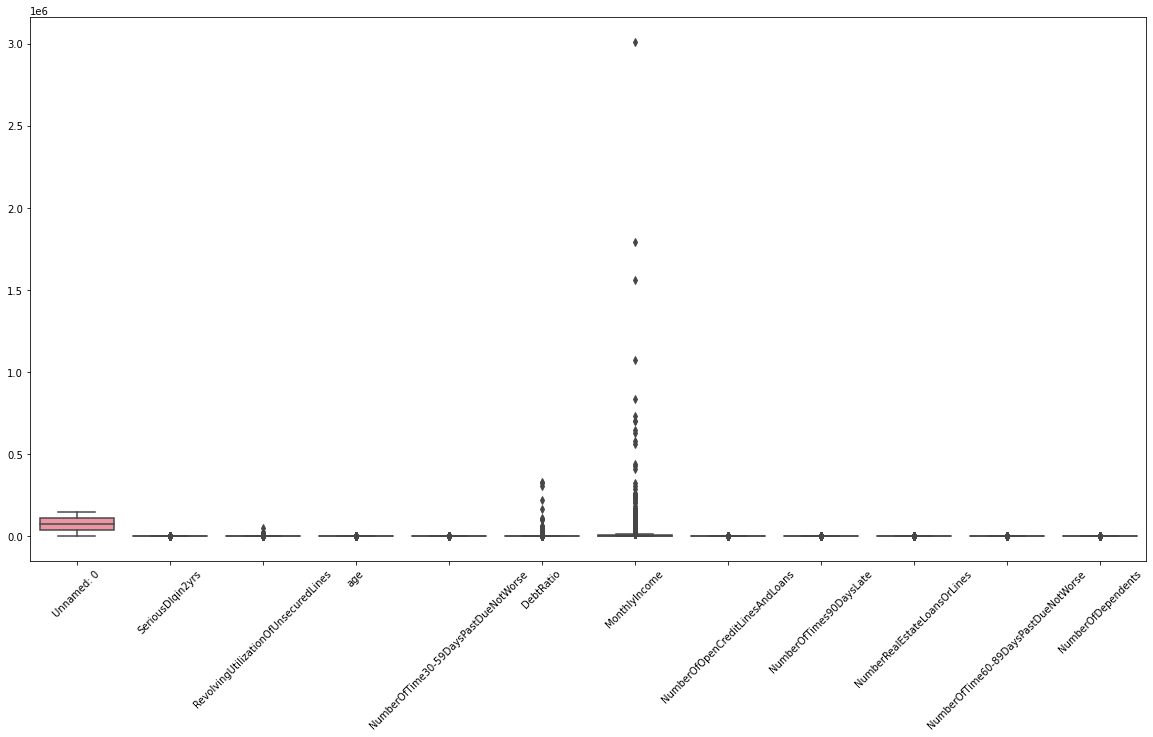

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=df1)

# xử lí ngoại lai trên cột age và MonthlyIncome

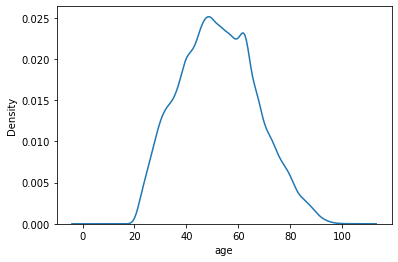

In [30]:
sns.kdeplot(data=df1['age'])

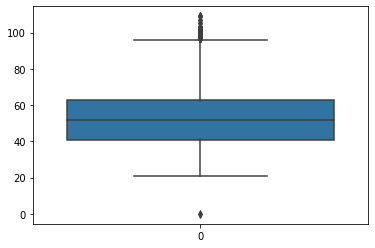

In [31]:
sns.boxplot(data=df1['age'])

In [32]:
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
df6 = df1
df6['outlier'] = ~((df1['age'] < (Q1 - 1.5*IQR)) | (df1['age'] > (Q3 + 1.5*IQR)))

In [34]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

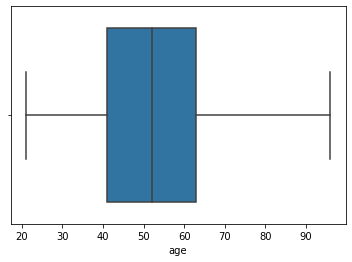

In [35]:
sns.boxplot(x=df6['age'])

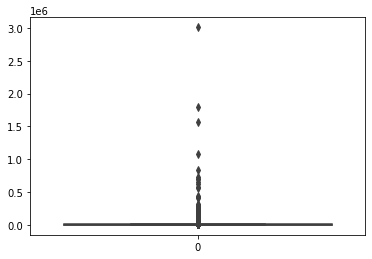

In [36]:
sns.boxplot(data=df1['MonthlyIncome'])

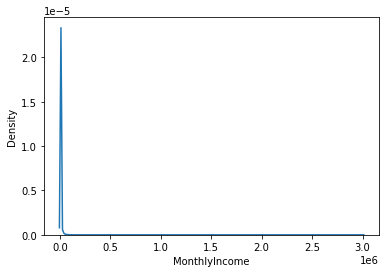

In [37]:
sns.kdeplot(data=df1['MonthlyIncome'])

In [38]:
Q1 = df1['MonthlyIncome'].quantile(0.25)
Q3 = df1['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

In [39]:
df6 = df1
df6['outlier'] = ~((df1['MonthlyIncome'] < (Q1 - 1.5*IQR)) | (df1['MonthlyIncome'] > (Q3 + 1.5*IQR)))

In [40]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

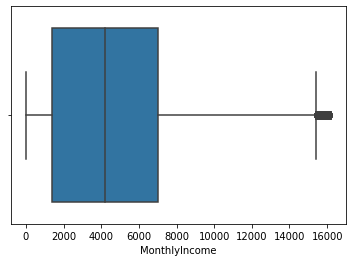

In [41]:
sns.boxplot(x=df6['MonthlyIncome'])

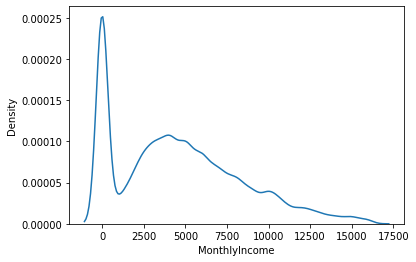

In [42]:
sns.kdeplot(x=df6['MonthlyIncome'])

# Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.<br>
# Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [43]:
df6

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,outlier
0,9,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0,True
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0,True
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0,True
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0,True
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,True
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,True
149989,149998,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0,True
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,True


Chia dữ liệu ở các cột thành 4,5,6 nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.

# làm mẫu trên column "age"

In [47]:
cats4 = pd.cut(df6['age'],4)
print(cats4)
cats5 = pd.cut(df6['age'],5)
print(cats5)
cats6 = pd.cut(df6['age'],6)
print(cats6)

0         (-0.109, 27.25]
2           (27.25, 54.5]
3           (27.25, 54.5]
4           (27.25, 54.5]
5           (27.25, 54.5]
               ...       
149987      (54.5, 81.75]
149988      (27.25, 54.5]
149989      (54.5, 81.75]
149990      (27.25, 54.5]
149991      (54.5, 81.75]
Name: age, Length: 145729, dtype: category
Categories (4, interval[float64, right]): [(-0.109, 27.25] < (27.25, 54.5] < (54.5, 81.75] <
                                           (81.75, 109.0]]
0         (21.8, 43.6]
2         (21.8, 43.6]
3         (43.6, 65.4]
4         (43.6, 65.4]
5         (21.8, 43.6]
              ...     
149987    (65.4, 87.2]
149988    (43.6, 65.4]
149989    (43.6, 65.4]
149990    (21.8, 43.6]
149991    (43.6, 65.4]
Name: age, Length: 145729, dtype: category
Categories (5, interval[float64, right]): [(-0.109, 21.8] < (21.8, 43.6] < (43.6, 65.4] <
                                           (65.4, 87.2] < (87.2, 109.0]]
0         (18.167, 36.333]
2         (18.167, 36.333]
3     

In [49]:
print(pd.value_counts(cats4))
print(pd.value_counts(cats5))
print(pd.value_counts(cats6))



(27.25, 54.5]      76860
(54.5, 81.75]      59199
(-0.109, 27.25]     5552
(81.75, 109.0]      4118
Name: age, dtype: int64
(43.6, 65.4]      73955
(21.8, 43.6]      43593
(65.4, 87.2]      26732
(87.2, 109.0]      1265
(-0.109, 21.8]      184
Name: age, dtype: int64
(36.333, 54.5]      58741
(54.5, 72.667]      49148
(18.167, 36.333]    23670
(72.667, 90.833]    13688
(90.833, 109.0]       481
(-0.109, 18.167]        1
Name: age, dtype: int64


In [57]:
type(cats4)

pandas.core.series.Series

In [52]:
cats_5 = pd.qcut(df6['age'], 5)
print(cats_5)
print(pd.value_counts(cats_5))

0         (-0.001, 39.0]
2         (-0.001, 39.0]
3           (48.0, 56.0]
4           (39.0, 48.0]
5           (39.0, 48.0]
               ...      
149987     (65.0, 109.0]
149988      (39.0, 48.0]
149989      (56.0, 65.0]
149990    (-0.001, 39.0]
149991      (56.0, 65.0]
Name: age, Length: 145729, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 39.0] < (39.0, 48.0] < (48.0, 56.0] <
                                           (56.0, 65.0] < (65.0, 109.0]]
(-0.001, 39.0]    31628
(39.0, 48.0]      29581
(56.0, 65.0]      28581
(65.0, 109.0]     27997
(48.0, 56.0]      27942
Name: age, dtype: int64


# Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [58]:
bins=[0,30,40,50,80,150]


In [60]:
cat_5 = pd.cut(df6['age'],bins)
cat_5

0          (0, 30]
2          (0, 30]
3         (50, 80]
4         (40, 50]
5         (30, 40]
            ...   
149987    (50, 80]
149988    (40, 50]
149989    (50, 80]
149990     (0, 30]
149991    (50, 80]
Name: age, Length: 145729, dtype: category
Categories (5, interval[int64, right]): [(0, 30] < (30, 40] < (40, 50] < (50, 80] < (80, 150]]

In [61]:
pd.value_counts(cat_5)

(50, 80]     72304
(40, 50]     33902
(30, 40]     23910
(0, 30]      10723
(80, 150]     4889
Name: age, dtype: int64

In [69]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Price
df_s = scaler.fit_transform(df6[['MonthlyIncome']])

In [65]:
df_s

array([[-1.21758442],
       [-0.56000312],
       [ 0.49239001],
       ...,
       [-1.21758442],
       [ 0.28590948],
       [ 0.9282349 ]])

In [70]:
cat5 = pd.cut(df6['MonthlyIncome'],bins)
cat5

0         NaN
2         NaN
3         NaN
4         NaN
5         NaN
         ... 
149987    NaN
149988    NaN
149989    NaN
149990    NaN
149991    NaN
Name: MonthlyIncome, Length: 145729, dtype: category
Categories (5, interval[int64, right]): [(0, 30] < (30, 40] < (40, 50] < (50, 80] < (80, 150]]

In [71]:
pd.value_counts(cat5)

(0, 30]      625
(80, 150]     46
(50, 80]       7
(40, 50]       5
(30, 40]       4
Name: MonthlyIncome, dtype: int64